Os seguintes valores são calculado com o histograma e são largamente utilizados para representar imagens:
- Média
- Variância
- Skewness
- Kurtosis
- Energia
- Entropia



In [ ]:
#dependencias necessárias
!python -m pip install -U scikit-image
!python -m pip install -U scikit-learn
!python -m pip install -U scipy
!python -m pip install -U pandas
!python -m pip install -U opencv-python
!python -m pip install -U openpyxl
!python -m pip install -U matplotlib




In [1]:

def descritor_histograma(img_rgb):
    """
    Recebe uma imagem RGB como parâmetro
    """
    import numpy as np

    # Defina o número de intervalos de intensidade (256 para imagens em 8 bits)
    num_bins = 256

    # Inicialize o histograma para cada canal de cor
    hist_r = np.zeros(num_bins, dtype=int)
    hist_g = np.zeros(num_bins, dtype=int)
    hist_b = np.zeros(num_bins, dtype=int)

    # Calcule o histograma manualmente para cada canal
    for row in img_rgb:
        for pixel in row:
            hist_r[pixel[0]] += 1
            hist_g[pixel[1]] += 1
            hist_b[pixel[2]] += 1

    # Calcule a média para cada canal
    mean_r = np.sum([i * hist_r[i] for i in range(num_bins)]) / np.sum(hist_r)
    mean_g = np.sum([i * hist_g[i] for i in range(num_bins)]) / np.sum(hist_g)
    mean_b = np.sum([i * hist_b[i] for i in range(num_bins)]) / np.sum(hist_b)

    media = mean_r + mean_g + mean_b

    # Calcule a variância para cada canal
    variance_r = np.sum([(i - mean_r) ** 2 * hist_r[i] for i in range(num_bins)]) / np.sum(hist_r)
    variance_g = np.sum([(i - mean_g) ** 2 * hist_g[i] for i in range(num_bins)]) / np.sum(hist_g)
    variance_b = np.sum([(i - mean_b) ** 2 * hist_b[i] for i in range(num_bins)]) / np.sum(hist_b)

    var = variance_r + variance_g + variance_b

    # Calcule a skewness para cada canal
    skewness_r = np.sum([((i - mean_r) / np.sqrt(variance_r)) ** 3 * hist_r[i] for i in range(num_bins)]) / np.sum(hist_r)
    skewness_g = np.sum([((i - mean_g) / np.sqrt(variance_g)) ** 3 * hist_g[i] for i in range(num_bins)]) / np.sum(hist_g)
    skewness_b = np.sum([((i - mean_b) / np.sqrt(variance_b)) ** 3 * hist_b[i] for i in range(num_bins)]) / np.sum(hist_b)

    sk = skewness_r + skewness_g + skewness_b

    # Calcule a kurtosis para cada canal
    kurtosis_r = np.sum([((i - mean_r) / np.sqrt(variance_r)) ** 4 * hist_r[i] for i in range(num_bins)]) / np.sum(hist_r)
    kurtosis_g = np.sum([((i - mean_g) / np.sqrt(variance_g)) ** 4 * hist_g[i] for i in range(num_bins)]) / np.sum(hist_g)
    kurtosis_b = np.sum([((i - mean_b) / np.sqrt(variance_b)) ** 4 * hist_b[i] for i in range(num_bins)]) / np.sum(hist_b)

    kur = kurtosis_r + kurtosis_g + kurtosis_b

    # Calcule a energia para cada canal
    energy_r = np.sum(hist_r ** 2)
    energy_g = np.sum(hist_g ** 2)
    energy_b = np.sum(hist_b ** 2)

    ener = energy_r + energy_g + energy_b

    # Calcule a entropia para cada canal
    hist_normalized_r = hist_r / np.sum(hist_r)
    entropy_r = -np.sum(hist_normalized_r * np.log2(hist_normalized_r + np.finfo(float).eps))

    hist_normalized_g = hist_g / np.sum(hist_g)
    entropy_g = -np.sum(hist_normalized_g * np.log2(hist_normalized_g + np.finfo(float).eps))

    hist_normalized_b = hist_b / np.sum(hist_b)
    entropy_b = -np.sum(hist_normalized_b * np.log2(hist_normalized_b + np.finfo(float).eps))

    entr = entropy_r + entropy_g + entropy_b


    return [media,var,sk,kur,ener,entr]



- Procurar uma base de imagens com duas classes ou mais
- Calcular os atributos de primeira ordem para cada imagem, e criar uma matriz, e adicionar uma coluna na matriz para os rótulos das classes. 
- Plotar os atributos dois a dois (scatter plot)
- A entrega será:
    - Notebook com os códigos;
    - Short paper de até 4 páginas com:
        - Introdução: apresentar o problema/base escolhida;
        - Metodologia: explicar os atributos e como são calculados;
        - Resultados: resultado da classificação e scatter plots dos atributos;
        - Extra: plotar os atributos utilizando um algoritmo de redução de dimensionalidade, ex: PCA, t-SNE;
        - Conclusão.
- Será feito pela equipe definida no inicio da disciplina;
- Entrega e apresentação: 25/10/2023

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier as mlp
from sklearn.metrics import accuracy_score
import numpy as np

def classification(X,y):

    """
    X é uma matriz onde cada linha corresponde aos atributos calculados com o descritor
    y são os rótulos da classe de cada imagem. Exemplo [0,1,0,0,1,2,2,0,0,0,...,1]
    """
    
    # separar conjuntos de treino e teste
    X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7)
    # criar instancia do classificador
    clf = mlp()
    # treinar o classificador
    clf.fit(X_train,y_train)
    # realizar a predicao
    pred = clf.predict(X_test)
    # calcular o resultado utilizando a acuracia
    acuracia = accuracy_score(y_test,pred)

    
    
    return np.round(acuracia,decimals=2) 

# Processamento dos dados

In [3]:
from glob import glob
import pandas as pd
from skimage.io import imread

data = []

dirs = "dados/*.jpg"
excel_name = 'dados.xlsx'
column_names = ['fname', 'deworm', 'mean', 'var', 'skew', 'kurtosis', 'energy', 'entropy']

fnames = glob(dirs)

for name in fnames:
    
    vermifuga = 0
    
    famacha = int(name[-5])
    if famacha > 2:
        vermifuga = 1
    
    img = imread(name)
    
    aux = descritor_histograma(img)
    aux.insert(0,name[6:])
    aux.insert(1,vermifuga)
    data.append(aux)
    
print(data)

df = pd.DataFrame(data,columns=column_names)

df.to_excel(excel_name, index=False)

[['img100_3.jpg', 1, 327.8815119689658, 6392.288054105268, 0.622529991088689, 5.883725636512311, 248219622, 21.821178839440815], ['img244_3.jpg', 1, 403.09708279708286, 9675.431392658516, -0.33492324166259657, 6.111258658944963, 32678298, 23.19478061473424], ['img222_1.jpg', 0, 278.6609265734266, 7133.583666083152, 1.8444001700454655, 7.666470508501824, 10722474, 22.22524023973336], ['img77_3.jpg', 1, 489.8687855113636, 14148.366175263462, -1.3081321426200985, 6.429262791106772, 25888442, 22.752975964627133], ['img33_4.jpg', 1, 431.0652613630665, 11754.489641068521, -1.2390107405387227, 6.315096680575559, 496438799, 23.30676359791653], ['img128_2.jpg', 0, 266.8956631049654, 6594.137161579453, 0.28051787821848306, 6.766733592690224, 849078, 21.92076629447292], ['img260_3.jpg', 1, 427.1309968309749, 6405.769137384799, -0.7833861478864101, 7.489138719696114, 21139915, 22.24172582459815], ['img10_2.jpg', 0, 356.31434856175974, 8277.478248886588, 1.2252117939544513, 7.43998283710701, 286908

# Carregamento dos dados já processados

In [2]:
import pandas as pd

# Carregar o arquivo Excel em um DataFrame
df = pd.read_excel('dados.xlsx')


matriz = []

#salvando os dados em uma matriz
for i in range(0,len(df),1):
    matriz.append([df["mean"][i],df["var"][i],df["skew"][i],df["kurtosis"][i], df["energy"][i],df["entropy"][i]])

famacha = df["deworm"]


#print(classification(matriz, famacha))


# Criação dos Scatter plots 2 a 2

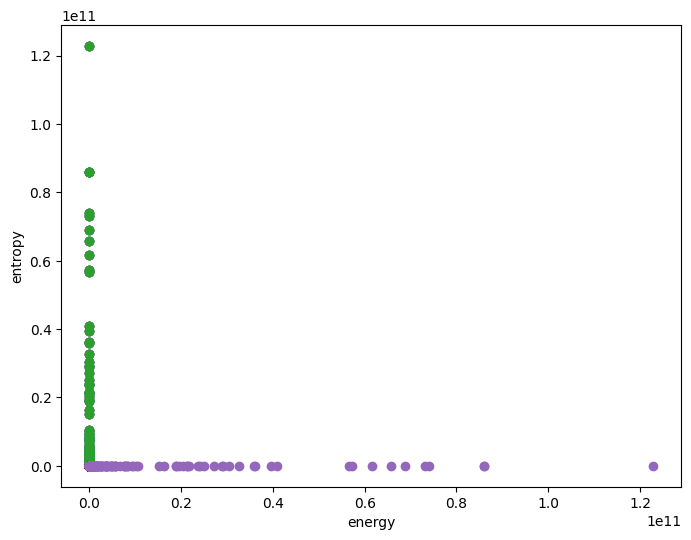

In [5]:
import matplotlib.pyplot as plt
import os

output = "scatter_plots"

if not os.path.exists(output):
    os.makedirs(output)
    
columns = ["mean", "var","skew", "kurtosis", "energy", "entropy"]

plt.figure(figsize=(8, 6))

for i in range(0,len(columns)-1,1):
    for j in range(i+1,len(columns),1):
    
    
        plt.scatter(df[columns[i]], df[columns[j]])
        plt.xlabel(columns[i])
        plt.ylabel(columns[j])
        fig_name = f'{columns[i]} X {columns[j]}'
        plt.savefig(os.path.sep.join((output,fig_name)))



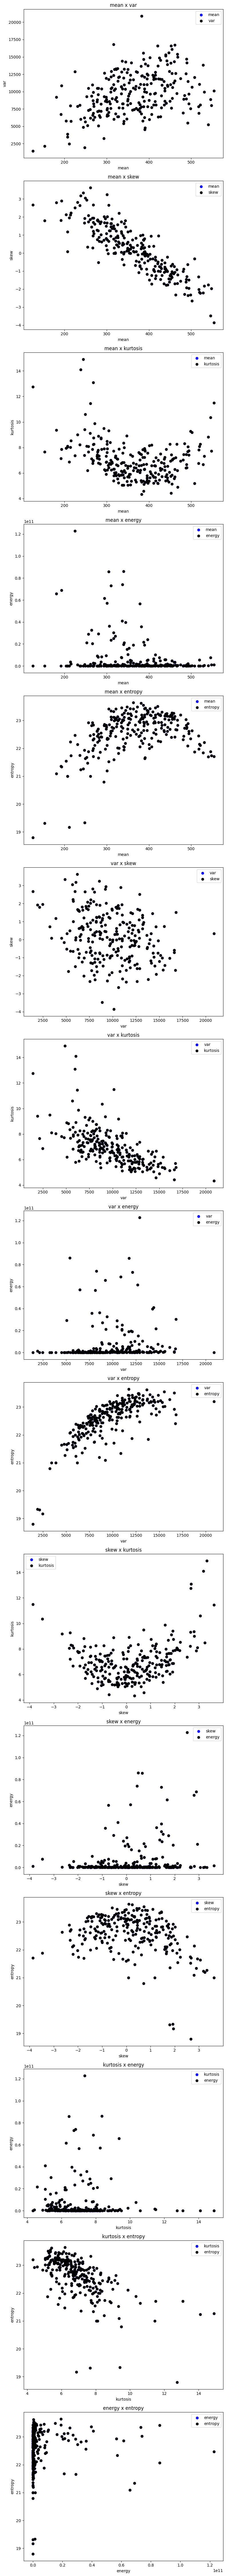

In [9]:
import matplotlib.pyplot as plt
import itertools

columns = ["mean", "var", "skew", "kurtosis", "energy", "entropy"]

combinations = list(itertools.combinations(columns, 2))

# Crie uma figura que conterá todos os scatter plots
fig, axes = plt.subplots(len(combinations), 1, figsize=(8, 6 * len(combinations)))

for i, combo in enumerate(combinations):
    col1, col2 = combo
    ax = axes[i]
    
    # Plote os pontos de col1 em azul e de col2 em preto
    ax.scatter(df[col1], df[col2], c='blue', label=col1)
    ax.scatter(df[col1], df[col2], c='black', label=col2)
    
    ax.set_xlabel(col1)
    ax.set_ylabel(col2)
    ax.set_title(f'{col1} x {col2}')
    
    # Crie uma legenda
    ax.legend()

# Ajuste o layout dos subplots
plt.tight_layout()

# Exiba a figura
plt.show()


# Procurando padrões

In [7]:
lista = []
import numpy as np

for i in range(0,1000,1):
    lista.append(classification(matriz, famacha))
    

print(f"\nMaior Valor: {max(lista)}\nMédia: {np.mean(lista)}\nMenor: {min(lista)}")


Maior Valor: 0.71
Média: 0.47737
Menor: 0.28
